<a href="https://colab.research.google.com/github/Luca-Davis/Luca-Bio108-Tutorial/blob/main/Conservation_Coding_Week_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Citation of paper
I was inspired by the Patrick Gonzalez et al 2018 Environ. Res. Lett paper we looked at during week 5.

###Hypotheisis:
Cimate change disproportionaly affects U.S national parks more than the U.S as a whole.
###Findings:
Mean annual tempature increased area increased 1.0 °C ± 0.2 between 1895 and 2010, double the rate of the u.s as a whole, meaning that national parks are more exposed to the effects of climate change.


#Objectives and questions I aim to take on

The Gonzales paper claimed that tempatures were increasing faster in national parks because they are more often in arctic regions and higher elevations. This made me curious if a glaciers were being disproportioanltey affected as well.
##Question:
### Are Alaskan glaciers expeircneing more historical warming than Alaska as a whole? Are Alaskan glaciers projected to experience more future warming than Alaska as a whole?

# Three: Describe with Markdown and implement with Python any data pre-processing
##Data Sources
###Alaskan Glaciers: https://nsidc.org/data/glacier_inventory/
### Alaska future annual mean tempature change 2071-2090: https://data-usfs.hub.arcgis.com/datasets/future-annual-temperature-alaska-image-service/about




###Install Neccesary Packages

In [ ]:
###Install Neccesary Packages
!pip install rasterio
!pip install earthpy
! pip install rasterstats
import rasterio
import rasterio.plot
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rasterstats import zonal_stats


###Mount drive and make quick plot of both layers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# assign glacier file to variable (contains more than just shp!)
g_path = ("/content/drive/MyDrive/Classes Spring 2025/Conservation Coding/data/Better Glacier Zip/nsidc0770_01.rgi20.Alaska.zip (Unzipped Files)/01.rgi20.Alaska.shp")

#using geopandas to read glacier file and get coordinate system and show the data frame.
glacier = gpd.read_file(g_path)
glacier.crs
glacier


#assigning url to raster and plotting it with raster.io This shows fututre annual mean tempature in alaska.
raster_path = ("/content/drive/MyDrive/Classes Spring 2025/Conservation Coding/data/Tavg_annual_RCP85_2080_AK.zip (Unzipped Files)/Tavg_annual_RCP85_2080_AK.tif")

tiff = rasterio.open(raster_path)


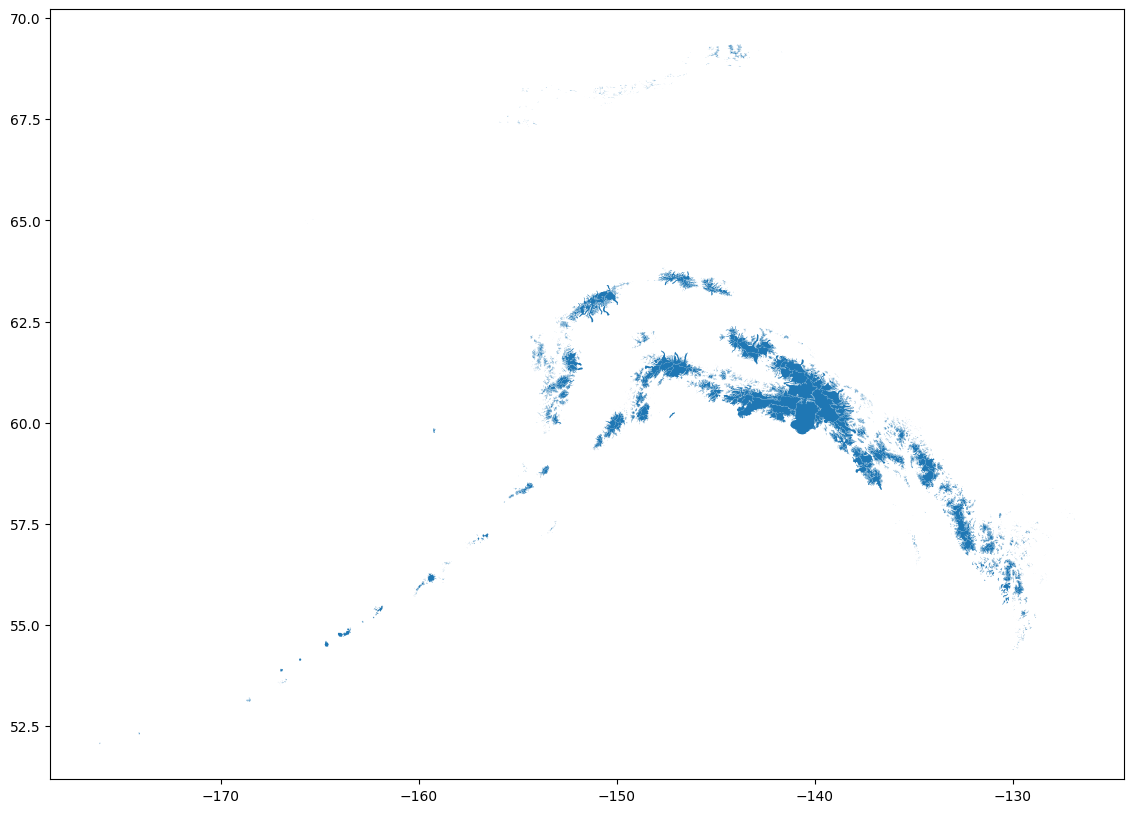

In [ ]:
#plotting glacier shapefile
fig, ax = plt.subplots(figsize = (20,10))
glacier.plot(ax=ax)
plt.show()


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:777: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


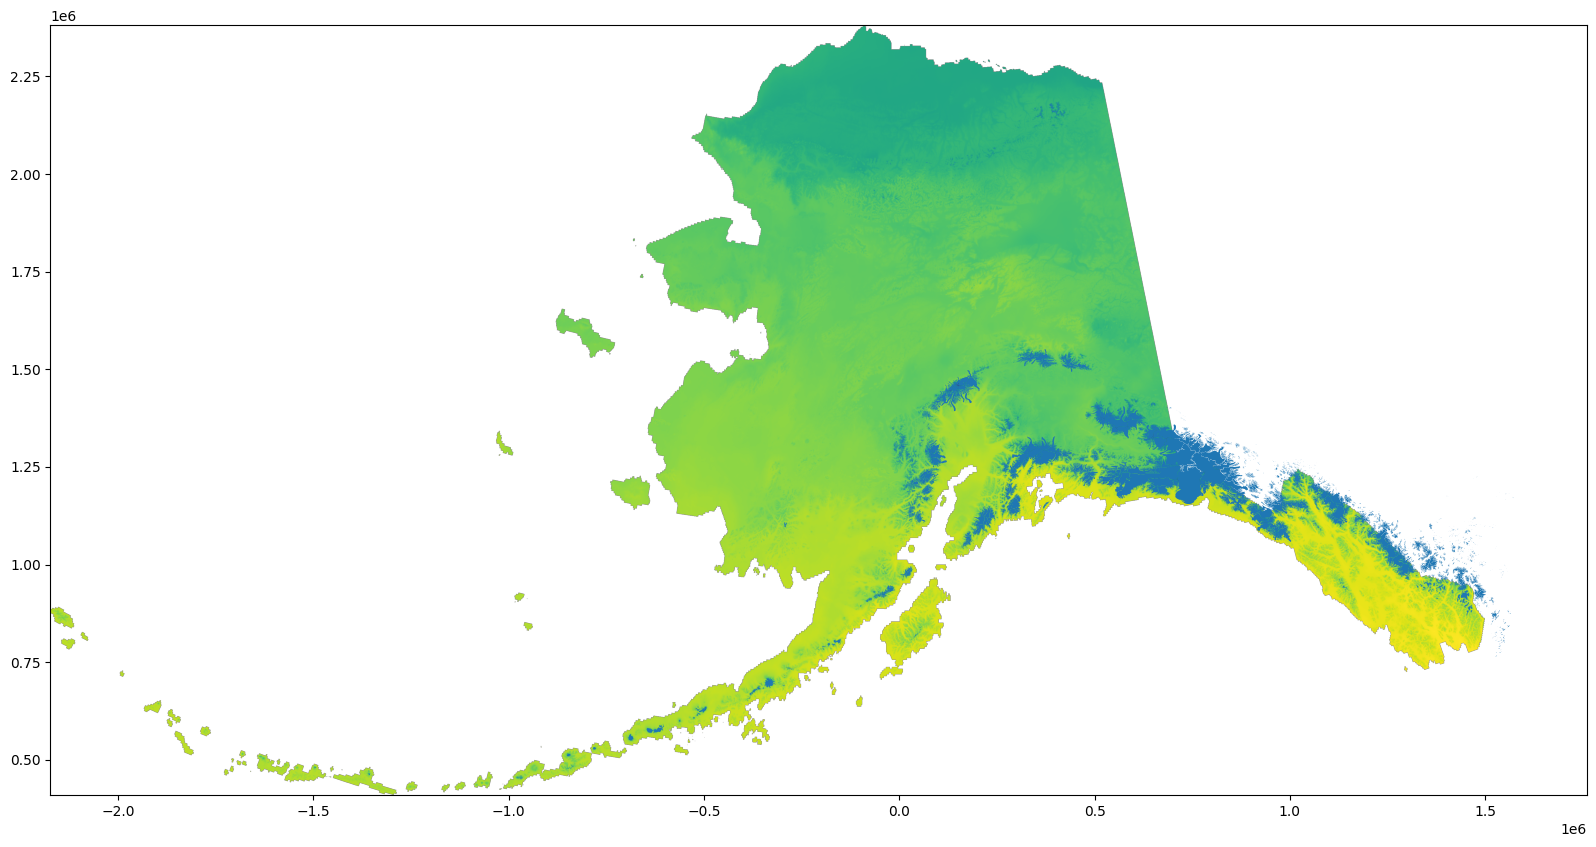

In [ ]:

glacier = glacier.to_crs(tiff.crs) # setting vector crs to match raster crs,"Albers_Conic_Equal_Area"

fig, ax = plt.subplots(figsize = (20,10)) # plotting the vector on the raster
rasterio.plot.show(tiff, ax=ax)
glacier.plot(ax=ax)

plt.show()


#Analytical aproach:

To acheive the objective I will extract the polygons raster values and compute the mean annual tempature change for glaciers in alaska, comparing that to the mean annual tempature change for alaska as a whole. I can also do this for analysis for historical tempature change if I can acces that data.
  I can also make a chart or graph visualizing each glacier's future annual mean tempature, comparing that to alaska as a whole.

# Implement the analysis and/or visualization using Python code.

In [ ]:
#using rasterstats'zonal stats to extract the mean fututre annual tempature change for the vectors
result = zonal_stats(
    glacier,
    tiff.read(1),
    nodata = tiff.nodata,
    affine = tiff.transform,
    stats = ['mean']
)
#the result is a data dictionary
result

[{'mean': 1.6996162452889447},
 {'mean': None},
 {'mean': 3.574166774749756},
 {'mean': -2.7725000381469727},
 {'mean': -2.116666555404663},
 {'mean': None},
 {'mean': 2.271304043856534},
 {'mean': 2.2035417556762695},
 {'mean': 0.92208331823349},
 {'mean': 0.6970832943916321},
 {'mean': 3.0183331966400146},
 {'mean': 3.5274999141693115},
 {'mean': None},
 {'mean': None},
 {'mean': 2.666249990463257},
 {'mean': -5.026249885559082},
 {'mean': None},
 {'mean': 1.3587499856948853},
 {'mean': 0.9950000047683716},
 {'mean': None},
 {'mean': 1.3195834159851074},
 {'mean': 1.307083249092102},
 {'mean': 2.3262500762939453},
 {'mean': -0.15902779897054037},
 {'mean': 2.4741666316986084},
 {'mean': 1.9833333492279053},
 {'mean': None},
 {'mean': 1.5129166841506958},
 {'mean': 0.45934527260916574},
 {'mean': 3.204583168029785},
 {'mean': 3.4058332443237305},
 {'mean': 3.7708334922790527},
 {'mean': 0.9362500309944153},
 {'mean': None},
 {'mean': 1.715416669845581},
 {'mean': 0.09996210445057262},

In [ ]:
#Turning the dictionary into a dataframe
df = pd.DataFrame(result)
#dropping empty values (some glaciers are not conatined in  the alaskan border and those turn up with empty values)
future_glacier_temp = df.dropna()
future_glacier_temp



,mean
0,1.699616
2,3.574167
3,-2.772500
4,-2.116667
6,2.271304
...,...
23105,-3.248333
23107,-4.017917
23108,-1.155500
23110,1.672083


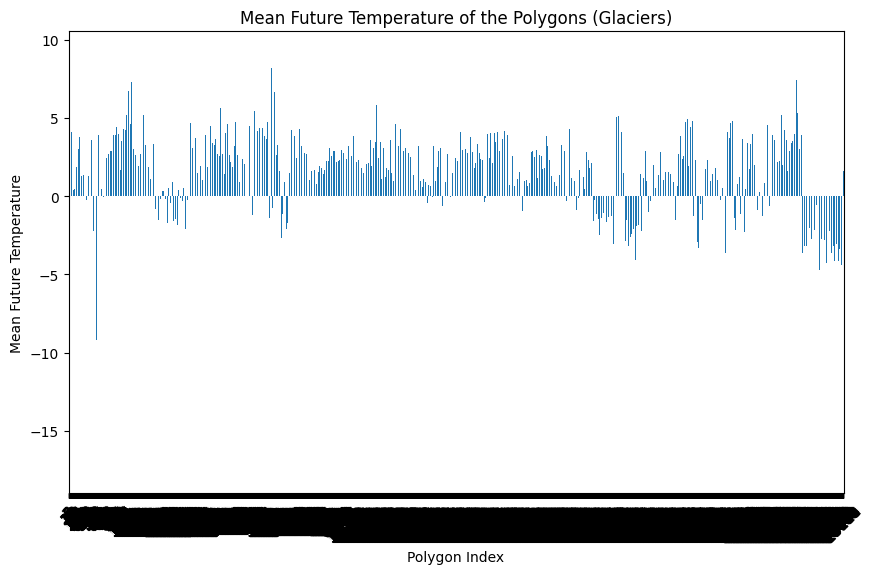

In [ ]:

# Plot future_glacier_temp
future_glacier_temp['mean'].plot(kind='bar', figsize=(10, 6))


plt.title('Future Annual Air Temperature of Alaskan Glaciers 2071-2090 ')
plt.xlabel('Polygon Index')
plt.ylabel('Mean Future Temperature')
plt.xticks(rotation=45)


plt.show()

#My Attempt at getting mean future tempature change for alaska as a whole
###1) get alaska polygon  
###2)extract the mean raster value for that polygon